In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
titanic_df = pd.read_csv('train.csv', encoding = 'utf-8')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### dropna 실습

In [18]:
cond = (titanic_df['Age'].isna)

Fillna를 이용한 대치


In [34]:
age_mean = titanic_df[['Age']].mean().round(2)
titanic_df['Age_mean'] = titanic_df['Age'].fillna(29.7)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_mean     891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


SimpleImputer 를 이용한 대치

In [45]:
from sklearn.impute import SimpleImputer

# SI 선언 및 Age 데이터를 이용한 학습

si = SimpleImputer(strategy='median')
si.fit(titanic_df[['Age']])

SimpleImputer(strategy='median')

In [46]:
# 대치될 값 보여줘
 
si.statistics_

array([28.])

In [47]:
# Null값이 대치될 컬럼을 넣어서 statistics 에 나온 값으로 대치해줘 

titanic_df['Age_si_mean'] = si.transform(titanic_df[['Age']])

In [48]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_mean     891 non-null    float64
 13  Age_si_mean  891 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


## Encoding 인코딩 연습하기

- Sex 성별은 라벨 인코더 Label Encoder 연습해보기
- 항구(Embarked)는 One Hot Encoder 연습해보기

In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [51]:
# 함수선언
 
le = LabelEncoder()
oe = OneHotEncoder()

In [52]:
# 학습하기

le.fit(titanic_df[['Sex']])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [57]:
#학습된 속성 확인하기

le.classes_

array(['female', 'male'], dtype=object)

In [56]:
# 각각데이터 0과 1로 변경

titanic_df['Sex_le'] = le.transform(titanic_df[['Sex']])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [58]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_si_mean,Sex_le
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0


In [68]:
# embarked 데이터로 OneHotEncoder 학습

oe.fit(titanic_df[['Embarked']])

OneHotEncoder()

In [71]:
# 메소드로 확인하기

def get_method(x) : 
    print('학습한클래스(범주)', oe.categories_)
    print('학습한클래스(리스트)', oe.get_feature_names_out())
    
get_method(titanic_df[['Embarked']])

학습한클래스(범주) [array(['C', 'Q', 'S', nan], dtype=object)]
학습한클래스(리스트) ['Embarked_C' 'Embarked_Q' 'Embarked_S' 'Embarked_nan']


In [74]:
embarked_csr = oe.transform(titanic_df[['Embarked']])
pd.DataFrame(embarked_csr.toarray(), columns = oe.get_feature_names_out())

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
886,0.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


## 스케일링 연습

- StandardScaler
- MinMaxScaler

In [76]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_mean     891 non-null    float64
 13  Age_si_mean  891 non-null    float64
 14  Sex_le       891 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 104.5+ KB


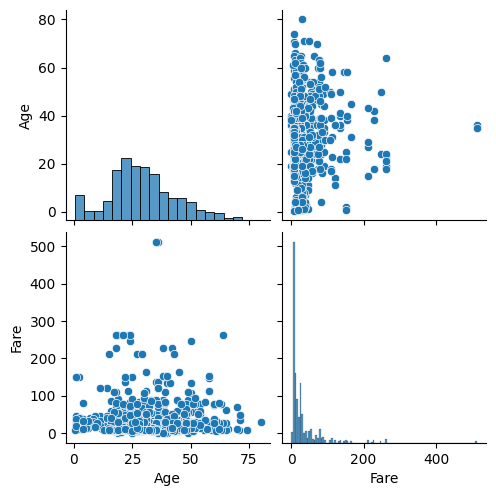

In [77]:
sns.pairplot(titanic_df[['Age', 'Fare']])

In [80]:
titanic_df[['Age', 'Fare']].describe().round(1)

,Age,Fare
count,714.0,891.0
mean,29.7,32.2
std,14.5,49.7
min,0.4,0.0
25%,20.1,7.9
50%,28.0,14.5
75%,38.0,31.0
max,80.0,512.3


- Age는 MinMaxScaler
- Fare는 StandardScaler

In [81]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [82]:
mm_sc = MinMaxScaler()
sd_sc = StandardScaler()

In [90]:
titanic_df['Age_mean_mm_sc'] = mm_sc.fit_transform(titanic_df[['Age_mean']])
titanic_df['Fare_sd_sc'] = sd_sc.fit_transform(titanic_df[['Fare']])

<Axes: xlabel='Age_mean_mm_sc', ylabel='Count'>

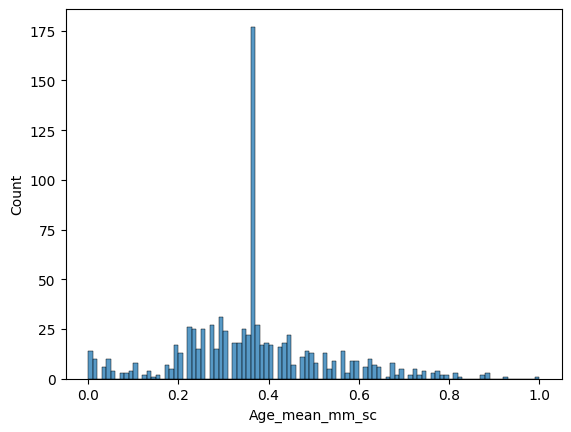

In [94]:
sns.histplot(titanic_df['Age_mean_mm_sc'], bins=100)


<Axes: xlabel='Fare_sd_sc', ylabel='Count'>

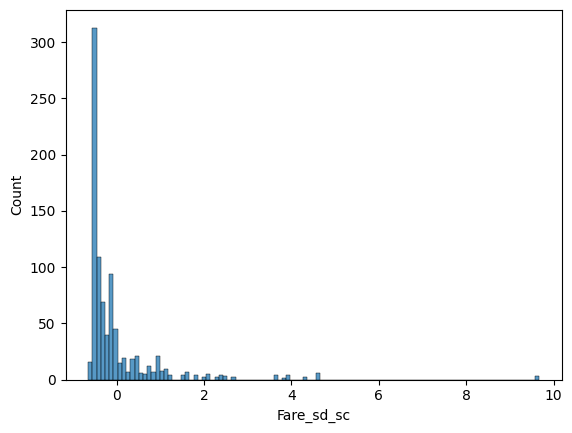

In [95]:
sns.histplot(titanic_df['Fare_sd_sc'])